# 🚘 Analyzing SF traffic stops with `Python`: Part 2

<img src="img/sf-traffic-2.jpg" alt="traffic" width="400" align="left"/>

This is Part 2. Other parts can be found [here](https://www.jdgrossman.com).

## Introduction

In this series of tutorials, we'll use `Python` to explore traffic stops in San Francisco (SF). In particular, we'll investigate whether there is evidence of racial discrimination in SF's policing practices. 

> **Important note**: Policing can be a sensitive subject. It's important to remember that each row in our data represents a real interaction between a police officer and driver. Please keep this in mind as you work through the tutorial, and be sure to engage with the material to the extent you're comfortable. 

By the end of the tutorials, you'll have foundational understanding of the following:
1. 📊 How to use `Python` to explore tabular data and calculate descriptive statistics. 
2. 📈 How to make an informative plot with `Python`
2. ⚖️ How to approach questions about social policy with data. 

Let's get started!

## ✅ Set up

While the core `Python` language contains many useful functions (e.g., `sum` and `len`), there is vast functionality built on top of `Python` by community members.

Make sure to run the cell below. It imports additional useful functions and loads in data. 

In [136]:
# Load in additional functions for manipulating and plotting data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This is where the data is stored.
STOPS_PATH = "https://github.com/joshuagrossman/dsb-win-2023/raw/main/opp-munging-plotting/data/sf_stop_data.feather"

# Read in the data
# Apply modifications from Part 1
stops = pd.read_feather(STOPS_PATH)
stops_w_yr = stops.copy(deep=True)
stops_w_yr['date'] = pd.to_datetime(stops.date)
stops_w_yr['yr'] = stops_w_yr.date.dt.year
stops_w_yr['age_first_digit'] = round(stops['age']/10).astype(str)

ModuleNotFoundError: No module named 'plotnine'

### 📊 Why do we need plots?

In Part 1, we used the `value_counts()` method to count the number of stops in each year:

In [49]:
n_stops_by_year = stops_w_yr.yr.value_counts()
n_stops_by_year

2009    110269
2010    104254
2011     99476
2015     85689
2012     82362
2013     74144
2016     40215
2014     39752
Name: yr, dtype: int64

If you stare at the table for a moment 👀, you may notice a few things:
- Stops appear to decrease over the years
- 2014 and 2016 appear to have fewer stops than we might expect

Let's try a similar exercise, but with more data:

In [31]:
n_stops_by_age_by_year = (
    stops_w_yr
    .groupby(['yr', 'age_first_digit'])
    # the `size` method counts the number of rows in each group
    # could also have used .agg('size')
    .size()
    # `reset_index()` ungroups the dataframe
    # name = 'n' names the aggregated column
    .reset_index(name = 'n')
)
n_stops_by_age_by_year

,yr,age_first_digit,n
0,2009,1.0,6
1,2009,10.0,7
2,2009,2.0,24722
3,2009,3.0,29175
4,2009,4.0,26180
...,...,...,...
83,2016,6.0,4940
84,2016,7.0,1277
85,2016,8.0,434
86,2016,9.0,58


# 🙄

It would take a long time to discover any meaningful patterns from 88 rows.

With a plot, patterns can emerge almost instantly. Try running the code below.

<AxesSubplot: xlabel='yr', ylabel='n'>

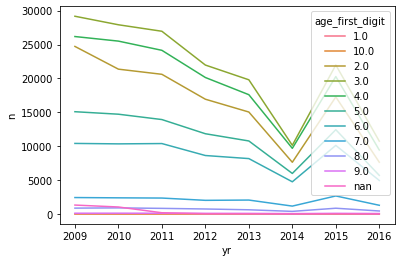

In [36]:
sns.lineplot(n_stops_by_age_by_year, x='yr', y='n', hue='age_first_digit')

# 😌 

Plots reduce the **cognitive burden** of gleaning insights from text. 

> According to a classic [research paper](https://brendans-island.com/blogsource/20170523-Documents/20170603-8611.pdf), humans can process images **60,000** times faster than text.

By the end of this tutorial, you'll be able to make clean and effective plots with `Python`.

## ⚙️ The mechanics of `seaborn`

`seaborn` is a popular `Python` package for simple plots. `seaborn` is built on top of `matplotlib`, an extensive plotting library that is a bit trickier to use.

> `seaborn` is often imported as `sns`. Silly explanation [here](https://stackoverflow.com/questions/41499857/seaborn-why-import-as-sns).

To make a basic plot, this all you have to tell `seaborn`:
- What kind of plot would you like (e.g., bar chart, line graph, or histogram)?
- What data should be used?
- Which columns should be plotted?

Let's see this in action with the `n_stops_by_year` table.

First, we need to convert `n_stops_by_year` to a `Pandas` dataframe:

In [62]:
# convert n_stops by year to a dataframe, and name the counted values
n_stops_by_year_df = (
    n_stops_by_year
    # convert to data frame, rename the count column
    .to_frame(name='n')
    # rename the index as yr
    .reset_index('yr')
)
n_stops_by_year_df

     yr       n
0  2009  110269
1  2010  104254
2  2011   99476
3  2015   85689
4  2012   82362
5  2013   74144
6  2016   40215
7  2014   39752


`ggplot2` in action:

<AxesSubplot: xlabel='yr', ylabel='n'>

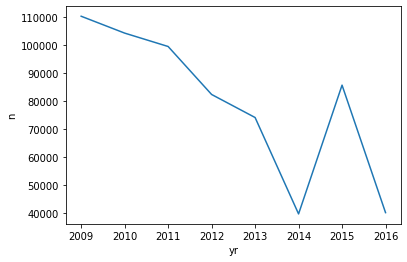

In [57]:
# sns.lineplot: Function to make line graphs
# Subsequent arguments: the columns to plot on each axis
sns.lineplot(n_stops_by_year_df, x = 'yr', y = 'n')

# this `matplotlib` function tells `seaborn` to print the plot
plt.show()

# this closes the current plot window. 
# Don't worry about this terminology for now!
plt.close()

🛠️ Let's break down each piece:

1. The `sns.lineplot` function **initializes** a blank line graph.

2. `n_stops_by_year_df` is our data.

3. `x = yr, y = n` tells `seaborn` that we should plot the `yr` column on the x-axis, and the `n` column on the y-axis.

## 🚀 Exercise

1. Modify the plotting code to create a bar chart, a scatterplot, and a regression line. 

> You may find the functions `sns.barplot()`, `sns.scatterplot()`, and `sns.lmplot()` helpful.

> `lm` refers to a linear model (i.e., a linear regression).

2. Try creating a scatterplot and a lineplot without closing the plot window between calls. What happens?

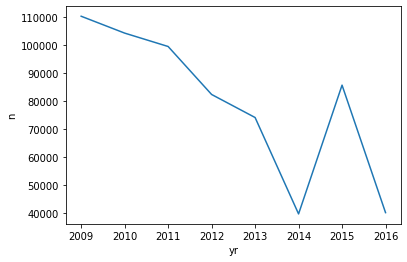

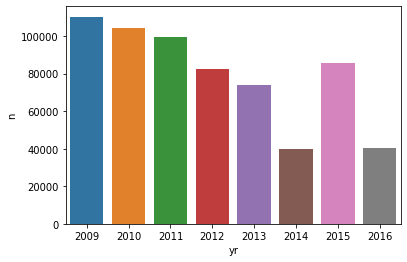

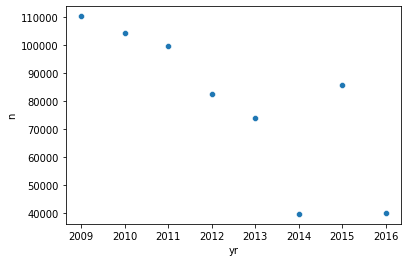

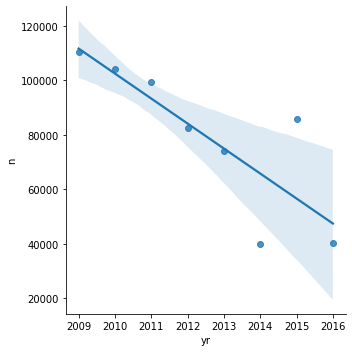

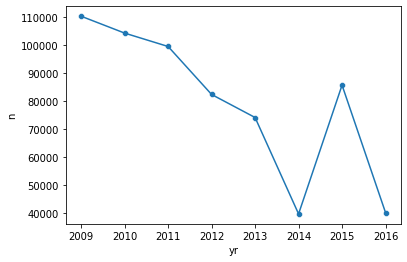

In [82]:
# sns.lineplot: Function to make line graphs
# Subsequent arguments: the columns to plot on each axis
sns.lineplot(n_stops_by_year_df, x = 'yr', y = 'n')

plt.show()
plt.close()

# START

# 1.

sns.barplot(n_stops_by_year_df, x = 'yr', y = 'n')

plt.show()
plt.close()

sns.scatterplot(n_stops_by_year_df, x = 'yr', y = 'n')

plt.show()
plt.close()

sns.lmplot(n_stops_by_year_df, x = 'yr', y = 'n')

plt.show()
plt.close()

# 2. The plots are layered on top of each other!
sns.lineplot(n_stops_by_year_df, x = 'yr', y = 'n')
sns.scatterplot(n_stops_by_year_df, x = 'yr', y = 'n')

plt.show()
plt.close()

# END

## 🎨 Adding <font color="red">c</font><font color="blue">o</font><font color="green">l</font><font color="orange">o</font><font color="purple">r</font> to our plot

So far, we've used two columns from our data. So, our plots are 2-dimensional (2D). 

How could we show data from more than one column?
- Number of stops **by race** for each year
- Number of stops **by gender** for each year
- Number of stops **by age** for each year

One option is a [3D plot](https://c3d.libretexts.org/CalcPlot3D/index.html). They exist, but they can be hard to read, and hard to generate. 

> 📰 For example, how would you put a 3D plot on the cover of the New York Times?

How can we add dimensions while keeping our plot 2D? ☀️<font color="red">C</font><font color="blue">O</font><font color="green">L</font><font color="orange">O</font><font color="purple">R</font> ☀️! Or anything else from this list:

- 〰️ Linetype (e.g. dotted or dashed)
- 📈 📉 Multiple 2D plots
- ⚫ Point size 
- And more!

Here's the example from earlier:

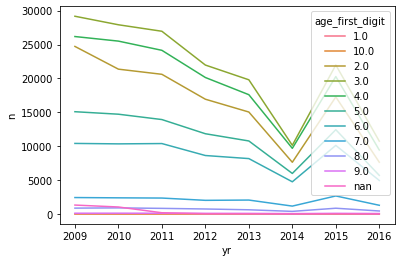

In [78]:
# Change 1: New data. `n_stops_by_age_by_year` was the super long table.
# Change 2: We added `hue = age_first_digit`. Hue refers to a mapping
# between values and colors.
sns.lineplot(n_stops_by_age_by_year, x='yr', y='n', hue='age_first_digit')

plt.show()
plt.close()

## 🚀 Exercise

1. Modify the plotting code to create a <font color="red">c</font><font color="blue">o</font><font color="green">l</font><font color="orange">o</font><font color="purple">r</font><font color="pink">e</font><font color="brown">d</font> bar chart, scatterplot, and regression line. 

> Think about which type of plot is most informative, and which one is least informative.

2. Instead of mapping `hue` to `age_first_digit`, try the following mappings:

- `style` to `age_first_digit`

- `size` to `age_first_digit`

Note: Some mappings may give you errors with certain `geom`'s. For example, does `size` make sense for a bar plot?

3. Make a line chart, but map `hue` to `age_first_digit` **and** map `style` to `age_first_digit`. What happens?



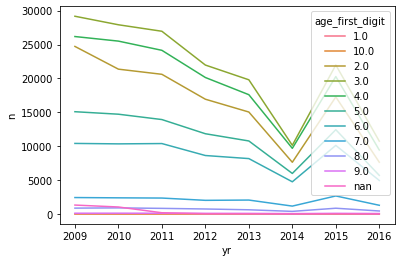

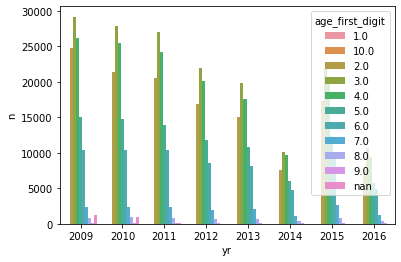

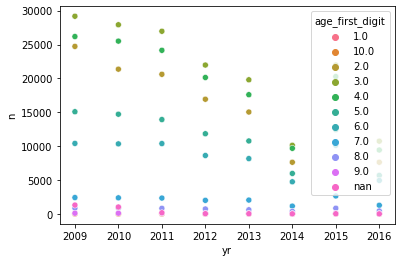

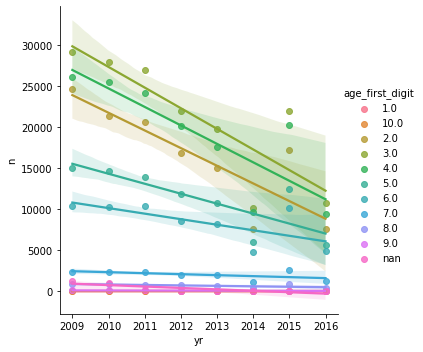

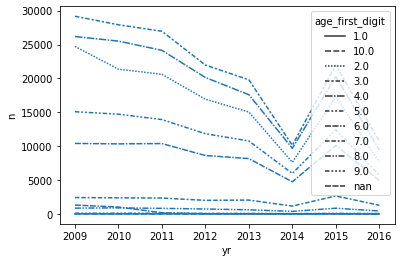

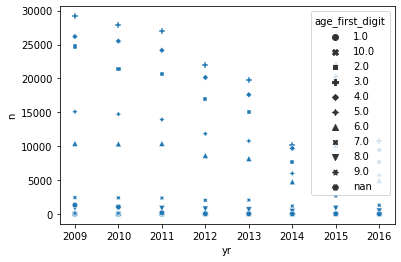

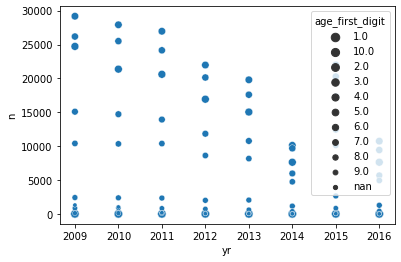

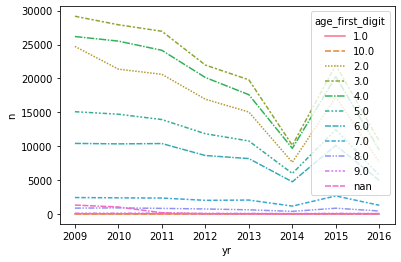

In [90]:
sns.lineplot(n_stops_by_age_by_year, x='yr', y='n', hue='age_first_digit')

plt.show()
plt.close()

# START

# 1. The bar chart and scatterplots are hard to read. Line plot is better.

sns.barplot(n_stops_by_age_by_year, x='yr', y='n', hue='age_first_digit')

plt.show()
plt.close()

sns.scatterplot(n_stops_by_age_by_year, x='yr', y='n', hue='age_first_digit')

plt.show()
plt.close()

sns.lmplot(n_stops_by_age_by_year, x='yr', y='n', hue='age_first_digit')

plt.show()
plt.close()

# 2. 

# After two or three linetypes, it becomes hard to distinguish the lines from
# one another. But, this is great when you can only print in black and white.
sns.lineplot(n_stops_by_age_by_year, x='yr', y='n', style='age_first_digit')

plt.show()
plt.close()

# We can also use different point shapes for each value of `age_first_digit`
sns.scatterplot(n_stops_by_age_by_year, x='yr', y='n', style='age_first_digit')

plt.show()
plt.close()

# It's a bit hard to see, but each value of `age_first_digit` gets its own size
# Sizing points is useful when you don't need to distinguish perfectly between
# points. In this case, we want to distinguish between people in each age group,
# so size isn't very helpful.
# If we instead wanted to know the relative number of people in their 20s 
# versus their 30s, we could more easily say 'Well, the points are bigger
# for people in their 30s, so there are more of them'. In this case, we might
# map the number of people in each age group to size.
sns.scatterplot(n_stops_by_age_by_year, x='yr', y='n', size='age_first_digit')

plt.show()
plt.close()

# # 3. 

# Each line gets its own color AND linetype. 
# Notice that arguments on separate lines are a lot easier to read. We don't
# need a continuation character `\` at the end of each line because the
# arguments are inside parentheses. 
sns.lineplot(
    n_stops_by_age_by_year, 
    x='yr', 
    y='n', 
    hue = 'age_first_digit', 
    style='age_first_digit'
)

plt.show()
plt.close()


# END

## Concluding thoughts

`seaborn` has many [additional features](https://www.tutorialspoint.com/seaborn/seaborn_quick_guide.htm) for making useful plots.

> You can see cool examples of all `seaborn` chart types on [this website](https://seaborn.pydata.org/examples/index.html).

Below are some ways we could clean up our colored line plot to make it more informative.

/var/folders/n2/zz0rp47n1z17rjyncsh3xstr0000gn/T/ipykernel_9955/1069205283.py:8: FutureWarning: The default value of regex will change from True to False in a future version.


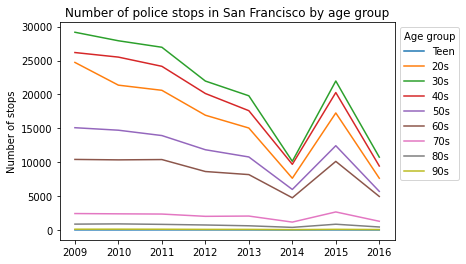

In [139]:
n_stops_by_age_by_year_modified = (
    n_stops_by_age_by_year
    # remove unknown ages or people > 99 years old
    .query('not age_first_digit in ["nan", "10.0"]')
    # 9.0 --> 90s
    .assign(
        age_first_digit = lambda df: (
            df.age_first_digit
            .str.replace('\.0', '0s')
            .str.replace('10s', 'Teen')
        )
    )
)

sns.lineplot(
    n_stops_by_age_by_year_modified, 
    x='yr', 
    y='n', 
    hue='age_first_digit'
)

plt.title('Number of police stops in San Francisco by age group')

plt.legend(title='Age group', bbox_to_anchor=(1, 1))

plt.xlabel('')
plt.ylabel('Number of stops')

plt.show()
plt.close()

Many folks prefer the **grammar of graphics** plotting paradigm used in the `R` package `ggplot2`.

The `plotnine` `Python` package allows you to make `matplotlib` plots using `ggplot2`-like syntax.

> Not all `ggplot2` functionality is imported into `plotnine`, but it gets close!

In [155]:
# need to individually import every ggplot2 function needed
from plotnine import (
    ggplot, 
    aes, 
    geom_line, 
    scale_x_continuous, 
    scale_y_continuous, 
    scale_color_hue,
    ggtitle,
    theme,
    element_blank,
    theme_bw
)

# The `mizani` package imports a lot of functionality of the `scales` 
# package that comes with `ggplot2`.
# we'll use comma_format to convert 10000 --> 10,000 automatically
from mizani.formatters import comma_format

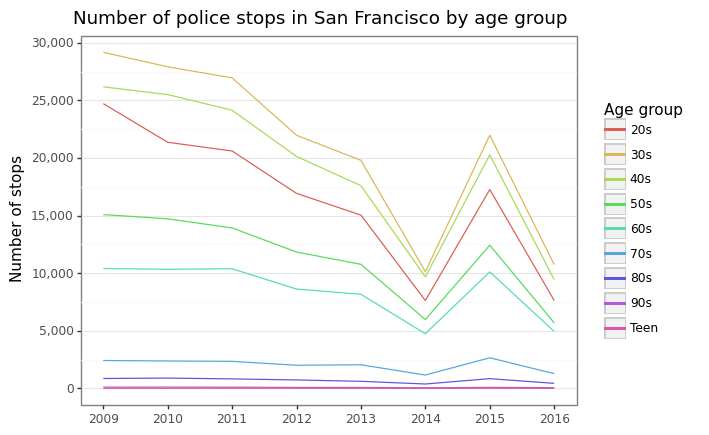

<ggplot: (339827616)>

In [157]:
(
    ggplot(
        n_stops_by_age_by_year_modified, 
        aes(x='yr', y='n', color='age_first_digit')
    ) +
    geom_line() +
    # Remove the label from the x axis, and show all the years
    scale_x_continuous(
        name='',
        labels=list(range(2009, 2016+1)),
        breaks=list(range(2009, 2016+1))
    ) +
    # Label the y axis
    scale_y_continuous(
        name="Number of stops",
        breaks=range(0, 30000+1, 5000),
        labels=comma_format(digits=0)
    ) +
    # Title the legend
    scale_color_hue(
        name="Age group"
    ) +
    theme_bw() +
    # Remove the x axis gridlines
    theme(
        # # note that every `.` in ggplot is replaced by `_` in plotnine
        panel_grid_major_x = element_blank(),
        panel_grid_minor_x = element_blank()
    ) +
    # Give the plot an informative title
    ggtitle(
        "Number of police stops in San Francisco by age group"
    )
)

The best way to learn how to plot something with `Python`? 

Head to Google and search `How to do X in seaborn/plotnine/matplotlib`!